## Importando os dados

In [177]:
# Importando o pandas
import pandas as pd

In [178]:
# Lendo a base de dados
base = pd.read_csv('covid_19_clean_complete.csv')

In [179]:
# Olhando as 5 primeiras linhas e as 5 últimas do conjuntos de dados
display(base)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


## Analisando os dados

#### Algumas colunas possuem muitos dados ausentes

In [180]:
# Mostrando informações da base de dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


#### Province/State possui muitos valores ausentes, então é interessante retirá-la para a análise

In [181]:
# Número de valores ausentes em cada coluna
base.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [182]:
# Apagando a coluna province/state
base2 = base.drop('Province/State', axis=1)
base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Date            49068 non-null  object 
 4   Confirmed       49068 non-null  int64  
 5   Deaths          49068 non-null  int64  
 6   Recovered       49068 non-null  int64  
 7   Active          49068 non-null  int64  
 8   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


In [183]:
# Verificando se ela foi retirada
base2.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [184]:
# Número de linhas e colunas do dataframa (linhas, colunas)
base2.shape

(49068, 9)

#### Verificando algumas informações estatísticas

In [185]:
# Informações estatísticas para entender melhor os dados
base2.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


#### Os dados coletados vão de 22/jan/2020 até 27/jul/2020

In [186]:
# data em que a coleta começou
base2['Date'].unique()[0]

'2020-01-22'

In [187]:
# data em que a coleta terminou
base2['Date'].unique()[-1]

'2020-07-27'

## Analisando os meses de Janeiro e Fevereiro

In [188]:
# Extraindo as datas dos meses de janeiro e fevereiro
import numpy as np

mes_janeiro_fevereiro = []
for data2 in base2['Date']:
    if ('2020-01' in data2) or ('2020-02' in data2):
        mes_janeiro_fevereiro.append(data2)
        
mes_janeiro_fevereiro = np.array(mes_janeiro_fevereiro)
mes_janeiro_fevereiro = np.unique(mes_janeiro_fevereiro)
mes_janeiro_fevereiro

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29'], dtype='<U10')

#### Taxa de mortes igual a 280,64% aproximadamente nos meses de janeiro e fevereiro

$$ Tx = \frac{m}{c} \times 100 $$

- Tx é a taxa de mortalidade nos meses de janeiro e fevereiro
- m é o número de mortes nos meses de janeiro e feveireiro
- c é o número de casos confirmados nos meses de janeiro e fevereiro

In [189]:
tx_morte = ((base2.query('Date in @mes_janeiro_fevereiro')['Deaths'].mean())/(base2.query('Date in @mes_janeiro_fevereiro')['Confirmed'].mean())) * 100
tx_morte

2.806393293422743

## Analisando os meses de Junho e Julho

In [190]:
# Extraindo as datas dos meses de junho e julho
mes_junho_julho = []
for data2 in base2['Date']:
    if ('2020-06') in data2 or ('2020-07' in data2):
        mes_junho_julho.append(data2)
        
mes_junho_julho = np.array(mes_junho_julho)
mes_junho_julho = np.unique(mes_junho_julho)
mes_junho_julho

array(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
       '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
       '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
       '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
       '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
       '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
       '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
       '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
       '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
       '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14',
       '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18',
       '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
       '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
       '2020-07-27'], dtype='<U10')

#### Taxa de mortes igual a 476,16% aproximadamente nos meses de junho e julho

$$ Tx = \frac{m}{c} \times 100 $$

- Tx é a taxa de mortalidade nos meses de junho e julho
- m é o número de mortes nos meses de junho e julho
- c é o número de casos confirmados nos meses de junho e julho

In [191]:
tx_morte = ((base2.query('Date in @mes_junho_julho')['Deaths'].mean())/(base2.query('Date in @mes_junho_julho')['Confirmed'].mean())) * 100
tx_morte

4.761681951117472

A mediana e a média estão muito distantes uma da outra. Analisando os dados de Janeiro, fevereiro, junho e julho, pode-se notar que ouve um aumento considerável de mortes. Além disso, o número que indica a taxa, por ser maior que um, demonstra que o número de mortes foi maior do que a capacidade de diagnosticar a doença.

#### Os 10 países com mais casos confirmados de covid

In [192]:
paises_mais_confirmados = base2[['Country/Region','Confirmed']].groupby(by='Country/Region')['Confirmed'].sum().sort_values(ascending=False)[0:10]
paises_mais_confirmados

Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64

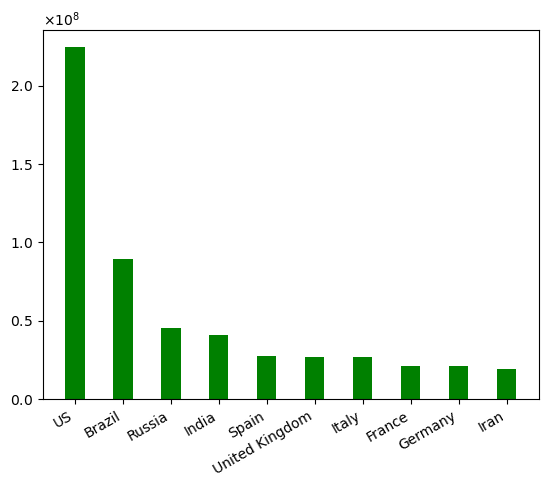

In [193]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(paises_mais_confirmados.index, paises_mais_confirmados.values, color ='green', width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.ticklabel_format(style='scientific', axis='y', useMathText=True)

plt.show()

#### Os 10 países com maior número de mortes

In [194]:
paises_mais_mortes = base2.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False)[0:10]
paises_mais_mortes

Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
Spain              3033030
Mexico             1728277
India              1111831
Iran               1024136
Belgium             963679
Name: Deaths, dtype: int64

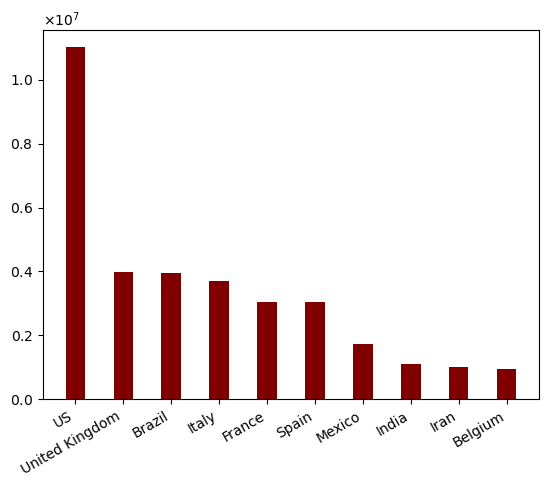

In [195]:
fig, ax = plt.subplots()
ax.bar(paises_mais_mortes.index, paises_mais_mortes.values, color ='maroon', width = 0.4)
plt.xticks(rotation=30, ha='right')

plt.ticklabel_format(style='scientific', axis='y', useMathText=True)
plt.show()

#### Casos confirmados por continente

In [196]:
casos_por_continente = base2.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
casos_por_continente

WHO Region
Americas                 402261194
Europe                   248879793
Eastern Mediterranean     74082892
South-East Asia           55118365
Western Pacific           26374411
Africa                    21791827
Name: Confirmed, dtype: int64

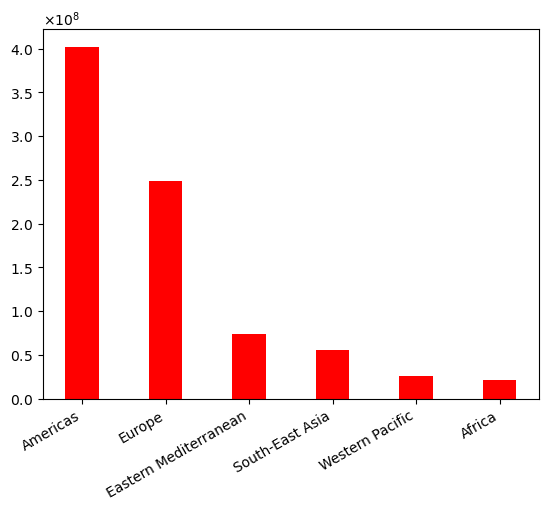

In [197]:
fig, ax = plt.subplots()
ax.bar(casos_por_continente.index, casos_por_continente.values, color ='red', width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.ticklabel_format(style='scientific', axis='y', useMathText=True)
plt.show()

#### Todos os países tiveram covid em algum momento durante o período analisado

In [198]:
# Número de países registrados no dataframe = 187
base2['Country/Region'].value_counts().index

Index(['China', 'Canada', 'France', 'United Kingdom', 'Australia',
       'Netherlands', 'Denmark', 'Afghanistan', 'Saudi Arabia', 'Romania',
       ...
       'India', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See',
       'Honduras', 'Hungary', 'Iceland', 'Lesotho'],
      dtype='object', length=187)

In [199]:
# Países em que o número de casos confirmados não é igual a zero
(base2.groupby('Country/Region')['Confirmed'].sum() == 0).value_counts()

False    187
Name: Confirmed, dtype: int64

False 187, indica que a condição imposta (casos confirmados igual a zero) é falsa nos 187 países. Logo, todos os países tiveram Covid em algum momento.

#### 66 países tiveram mais casos de Covid do que a média

In [200]:
# Casos confirmados por país
paises_maior_media = base2.loc[base2['Confirmed'] > base2['Confirmed'].mean(),['Country/Region','Confirmed']].groupby('Country/Region')['Confirmed'].sum()
paises_maior_media

Country/Region
Afghanistan               1650014
Algeria                    447494
Argentina                 4090997
Armenia                   1212837
Austria                    948533
                          ...    
US                      224298618
Ukraine                   2878432
United Arab Emirates      3357726
United Kingdom           26501831
Uzbekistan                 153447
Name: Confirmed, Length: 66, dtype: int64

In [201]:
paises_maior_media = paises_maior_media.index
paises_maior_media = np.array(paises_maior_media)

In [202]:
# Lista com os países que possuem mais casos do que a média
paises_maior_media

array(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Bolivia', 'Brazil', 'Cameroon', 'Canada', 'Chile', 'China',
       'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt', 'France',
       'Germany', 'Ghana', 'Guatemala', 'Honduras', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Mexico', 'Moldova',
       'Morocco', 'Nepal', 'Netherlands', 'Nigeria', 'Oman', 'Pakistan',
       'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uzbekistan'],
      dtype=object)

#### Os continentes desses 66 países são mostrados abaixo

In [203]:
continentes_maior_media = base2.query("`Country/Region` in @paises_maior_media").groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
continentes_maior_media

WHO Region
Americas                 399941715
Europe                   239457789
Eastern Mediterranean     72183389
South-East Asia           54378725
Western Pacific           22559580
Africa                    16538602
Name: Confirmed, dtype: int64